<a href="https://colab.research.google.com/github/Zaid624/Customer-Segmentation/blob/main/Customer_Segmentation_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
#Customer Segmentation

#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score




In [4]:
#Calling the dataset through pandas
df = pd.read_csv(r'/content/Online Shopping Data.csv')
df.head()

,Gender,Online_Shopping_Freq,Online_Purchase_Proportion,Review_Check_Freq,Attraction_Factor,Retailer_Choice_Factors,Preferred_Payment,Local_vs_Intl_Retailers,Preferred_Marketplace,Security_Concern_Level,Promo_Participation,Price_Sensitivity,Comfortable_Price_Range,Frequent_Products,Major_Drawback,Authenticity_Concern,Desired_Improvements
0,Male,Rarely or Never,0-20 %,Always,Ease and Comfort of shopping from home,Brand reputation and trustworthiness,Credit or debit card,"No preference, depends on the product",Daraz,Very concerned,Occasionally participate,Moderately price-sensitive,1k to 5k,Clothing and fashion accessories,"Yes, issues with product quality",Neutral or unsure,Enhanced customer reviews and ratings system
1,Female,Rarely or Never,0-20 %,Always,Attractive discounts and promotions,Product reviews and ratings,Cash on delivery (if available),"No preference, depends on the product",Others,Neutral,Rarely or Never participate,Slightly price-sensitive,1k to 5k,Clothing and fashion accessories,"No, I have not experienced any drawbacks",Neutral or unsure,Enhanced customer reviews and ratings system
2,Female,Once in a month,41-60 %,Always,Ease and Comfort of shopping from home,Brand reputation and trustworthiness,Cash on delivery (if available),"No preference, depends on the product",Daraz,Somewhat concerned,Frequently participate,Moderately price-sensitive,1k to 5k,Clothing and fashion accessories,"Yes, issues with product quality","Yes, always confident in product authenticity ...","Better product descriptions and images, Enhanc..."
3,Male,Once in a month,41-60 %,Always,Ease and Comfort of shopping from home,Product reviews and ratings,Cash on delivery (if available),Prefer local retailers,AliExpress,Somewhat concerned,Rarely or Never participate,Moderately price-sensitive,1k to 5k,Clothing and fashion accessories,"No, I have not experienced any drawbacks",Neutral or unsure,Better product descriptions and images
4,Female,Rarely or Never,0-20 %,Frequently,Ease and Comfort of shopping from home,Brand reputation and trustworthiness,Cash on delivery (if available),"No preference, depends on the product",Amazon,Very concerned,Rarely or Never participate,Moderately price-sensitive,less than 1k,"Books and media (e.g., movies, music)","Yes, issues with product quality","No, often concerned about product authenticity...","Better product descriptions and images, Improv..."


In [6]:
# Information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Gender                      201 non-null    object
 1   Online_Shopping_Freq        201 non-null    object
 2   Online_Purchase_Proportion  201 non-null    object
 3   Review_Check_Freq           201 non-null    object
 4   Attraction_Factor           201 non-null    object
 5   Retailer_Choice_Factors     201 non-null    object
 6   Preferred_Payment           201 non-null    object
 7   Local_vs_Intl_Retailers     201 non-null    object
 8   Preferred_Marketplace       201 non-null    object
 9   Security_Concern_Level      201 non-null    object
 10  Promo_Participation         201 non-null    object
 11  Price_Sensitivity           201 non-null    object
 12  Comfortable_Price_Range     201 non-null    object
 13  Frequent_Products           201 non-null    object

In [7]:
#renaming the columns of the dataset for the easy reading
df.rename(columns={
    "Online_Shopping_Freq" : "Online Shopping",
    "Online_Purchase_Proportion" : "Online Purchase",
    "Review_Check_Freq" : "Review Check",
    "Attraction_Factor" : "Attraction",
    "Retailer_Choice_Factors" : "Retailer Choice",
    "Preferred_Payment" : "Payment Type",
    "Local_vs_Intl_Retailers" : "Retailer Competetion",
    "Preferred_Marketplace" : "Preferred Marketplace",
    "Security_Concern_Level" : "Security Concern",
    "Promo_Participation" : "Promo Participation",
    "Price_Sensitivity" : "Price Sensitivity",
   "Comfortable_Price_Range" : "Comfort Price",
    "Frequent_Products" : "Frequent Product",
   "Major_Drawback" : "Major Drawback",
   "Authenticity_Concern" : "Authenticity Concern",
   "Desired_Improvements" : "Desired Improvements"
},inplace=True)

df.head()

,Gender,Online Shopping,Online Purchase,Review Check,Attraction,Retailer Choice,Payment Type,Retailer Competetion,Preferred Marketplace,Security Concern,Promo Participation,Price Sensitivity,Comfort Price,Frequent Product,Major Drawback,Authenticity Concern,Desired Improvements
0,Male,Rarely or Never,0-20 %,Always,Ease and Comfort of shopping from home,Brand reputation and trustworthiness,Credit or debit card,"No preference, depends on the product",Daraz,Very concerned,Occasionally participate,Moderately price-sensitive,1k to 5k,Clothing and fashion accessories,"Yes, issues with product quality",Neutral or unsure,Enhanced customer reviews and ratings system
1,Female,Rarely or Never,0-20 %,Always,Attractive discounts and promotions,Product reviews and ratings,Cash on delivery (if available),"No preference, depends on the product",Others,Neutral,Rarely or Never participate,Slightly price-sensitive,1k to 5k,Clothing and fashion accessories,"No, I have not experienced any drawbacks",Neutral or unsure,Enhanced customer reviews and ratings system
2,Female,Once in a month,41-60 %,Always,Ease and Comfort of shopping from home,Brand reputation and trustworthiness,Cash on delivery (if available),"No preference, depends on the product",Daraz,Somewhat concerned,Frequently participate,Moderately price-sensitive,1k to 5k,Clothing and fashion accessories,"Yes, issues with product quality","Yes, always confident in product authenticity ...","Better product descriptions and images, Enhanc..."
3,Male,Once in a month,41-60 %,Always,Ease and Comfort of shopping from home,Product reviews and ratings,Cash on delivery (if available),Prefer local retailers,AliExpress,Somewhat concerned,Rarely or Never participate,Moderately price-sensitive,1k to 5k,Clothing and fashion accessories,"No, I have not experienced any drawbacks",Neutral or unsure,Better product descriptions and images
4,Female,Rarely or Never,0-20 %,Frequently,Ease and Comfort of shopping from home,Brand reputation and trustworthiness,Cash on delivery (if available),"No preference, depends on the product",Amazon,Very concerned,Rarely or Never participate,Moderately price-sensitive,less than 1k,"Books and media (e.g., movies, music)","Yes, issues with product quality","No, often concerned about product authenticity...","Better product descriptions and images, Improv..."


In [8]:
#Null Values
print(df.isnull().sum())

Gender                   0
Online Shopping          0
Online Purchase          0
Review Check             0
Attraction               0
Retailer Choice          0
Payment Type             0
Retailer Competetion     0
Preferred Marketplace    0
Security Concern         0
Promo Participation      0
Price Sensitivity        0
Comfort Price            0
Frequent Product         0
Major Drawback           0
Authenticity Concern     0
Desired Improvements     0
dtype: int64


<ipython-input-9-f11098e3a6d5>:8: UserWarning: Tight layout not applied. tight_layout cannot make Axes width small enough to accommodate all Axes decorations
  plt.tight_layout(pad=2.0)


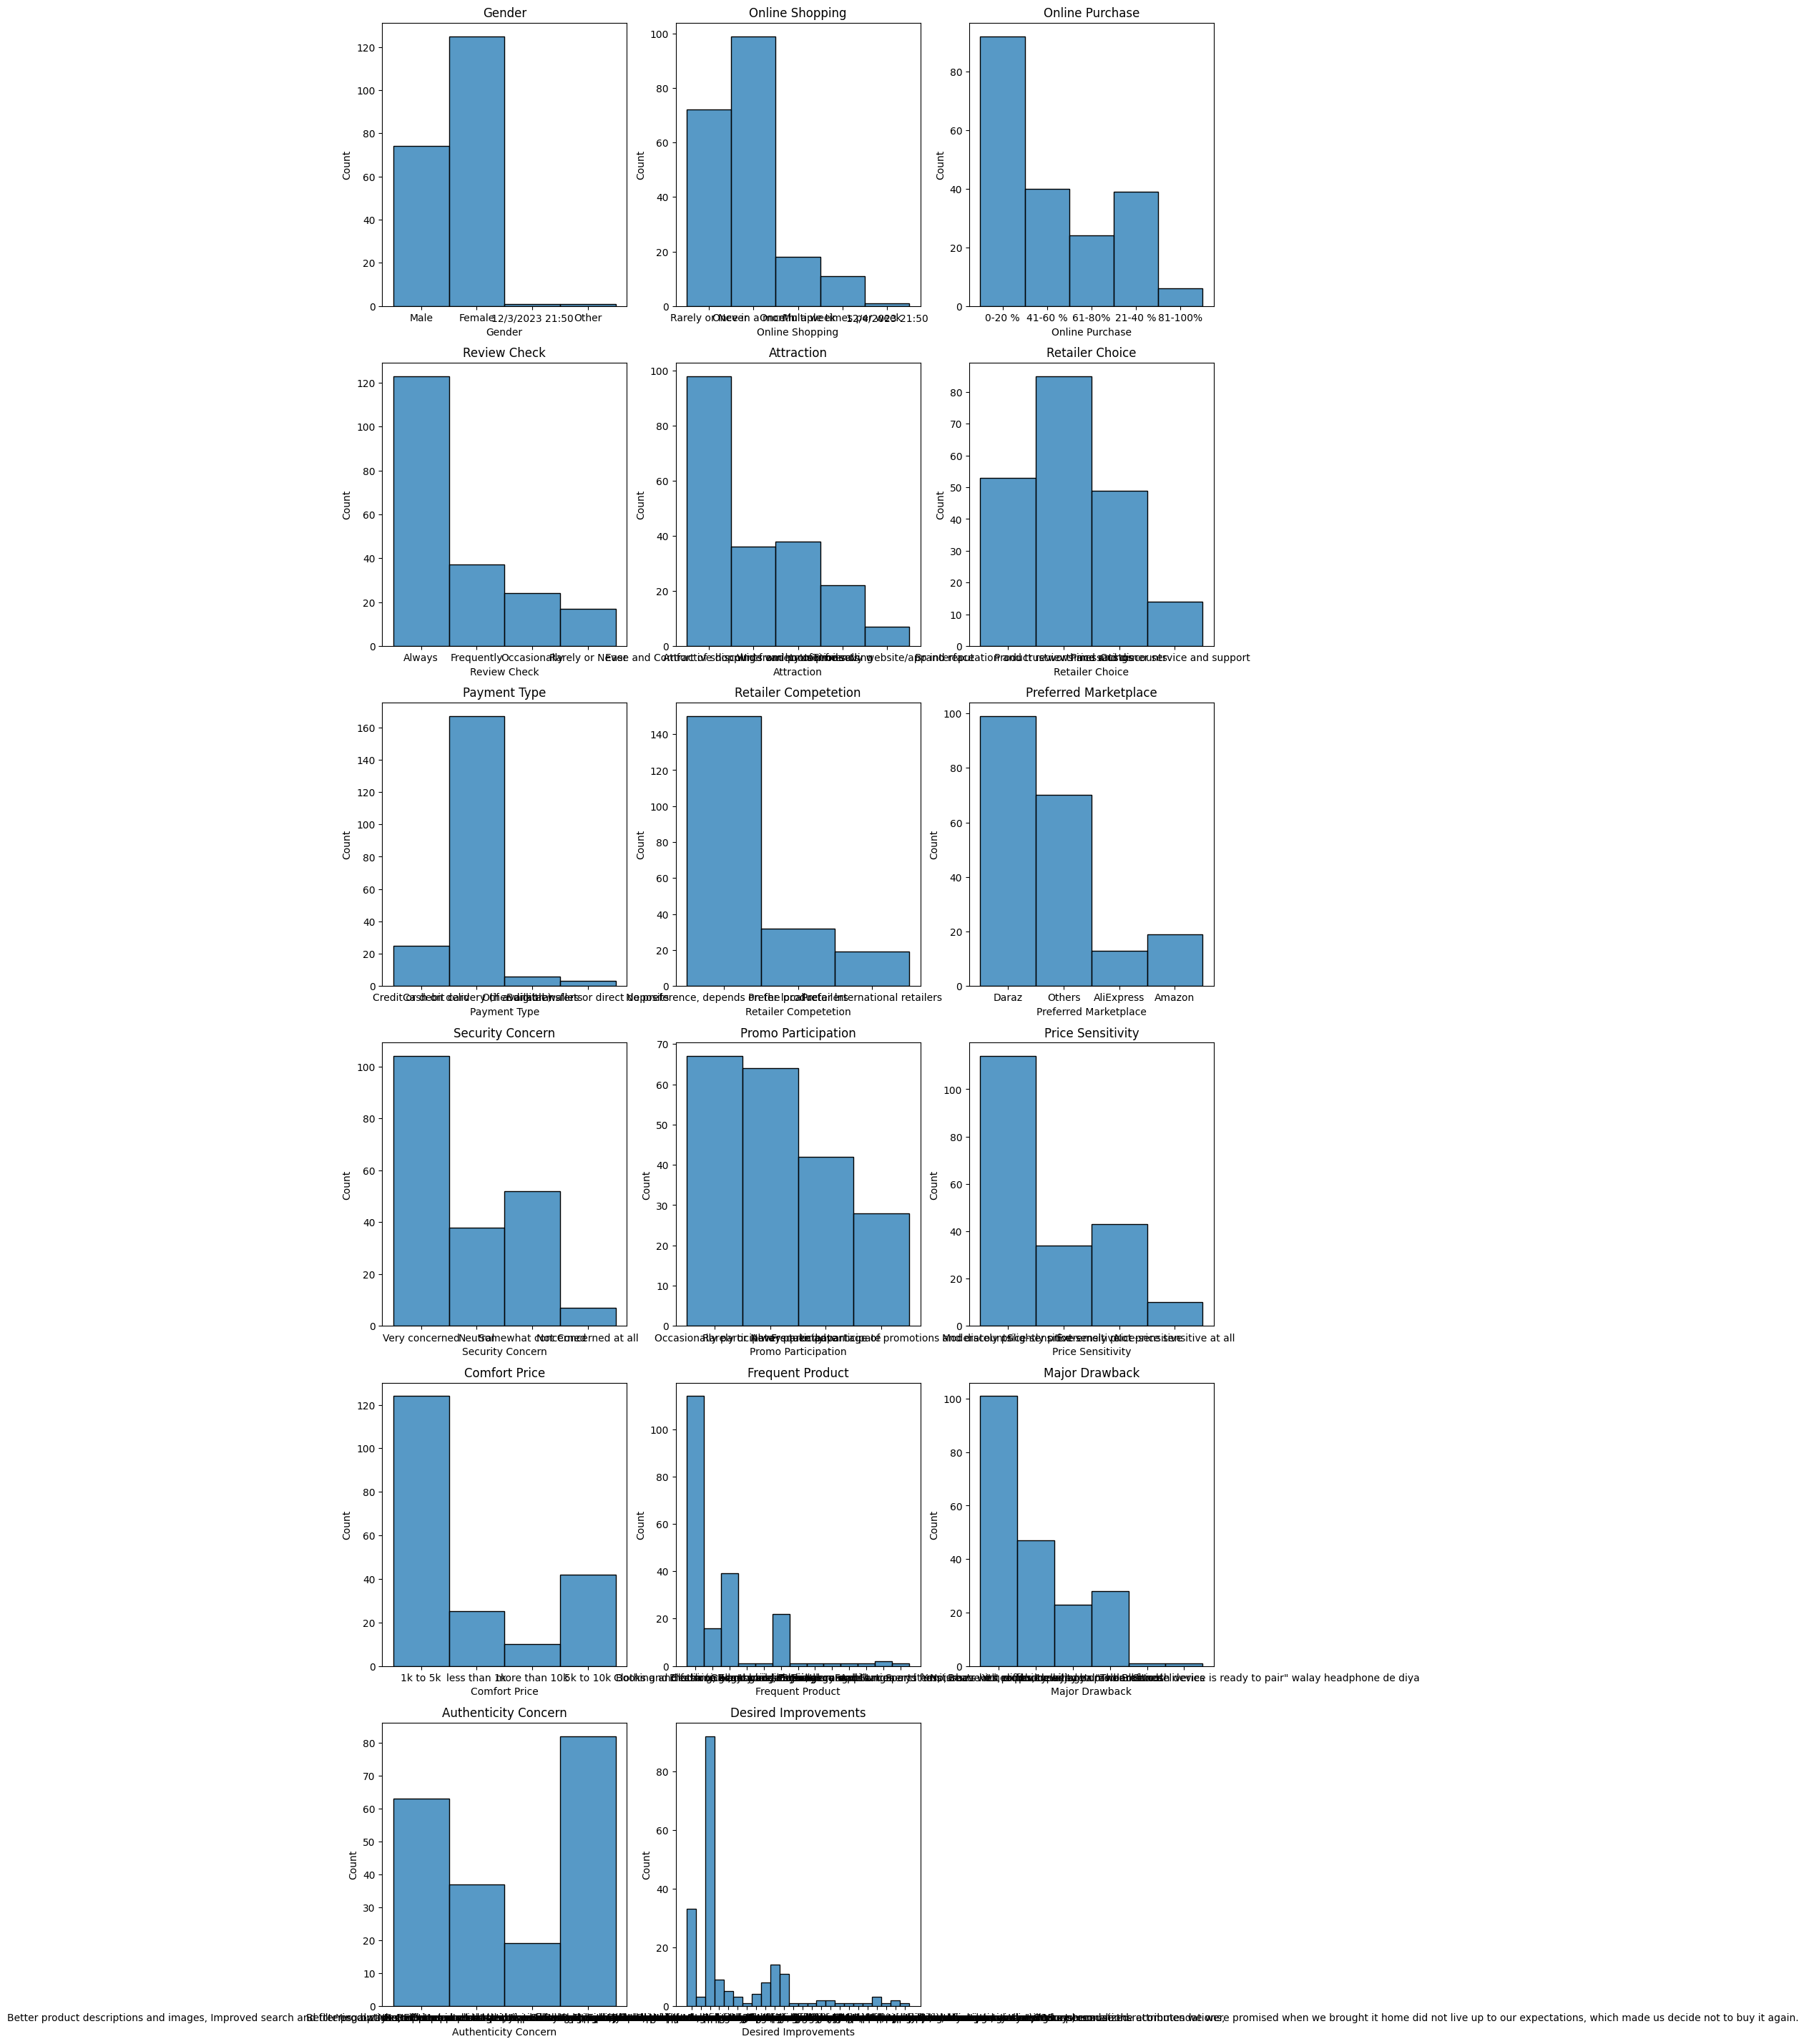

In [9]:
num_cols = len(df.columns)
rows = (num_cols // 3) + (num_cols % 3 > 0)
plt.figure(figsize=(15,6*rows))
for i,col in enumerate(df.columns):
  plt.subplot(rows,3,i+1)
  sns.histplot(df[col],kde=False)
  plt.title(col)
plt.tight_layout(pad=2.0)
plt.show()

In [10]:
# Identify categorical columns dynamically
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

# Encode all categorical columns
label_encoders = {}  # Store encoders for inverse_transform (if needed)
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Save encoder

print("Encoded Data:\n", df.head())

Encoded Data:
    Gender  Online Shopping  Online Purchase  Review Check  Attraction  \
0       2                4                0             0           1   
1       1                4                0             0           0   
2       1                2                2             0           1   
3       2                2                2             0           1   
4       1                4                0             1           1   

   Retailer Choice  Payment Type  Retailer Competetion  Preferred Marketplace  \
0                0             2                     0                      2   
1                3             1                     0                      3   
2                0             1                     0                      2   
3                3             1                     2                      0   
4                0             1                     0                      1   

   Security Concern  Promo Participation  Price Sensitivity

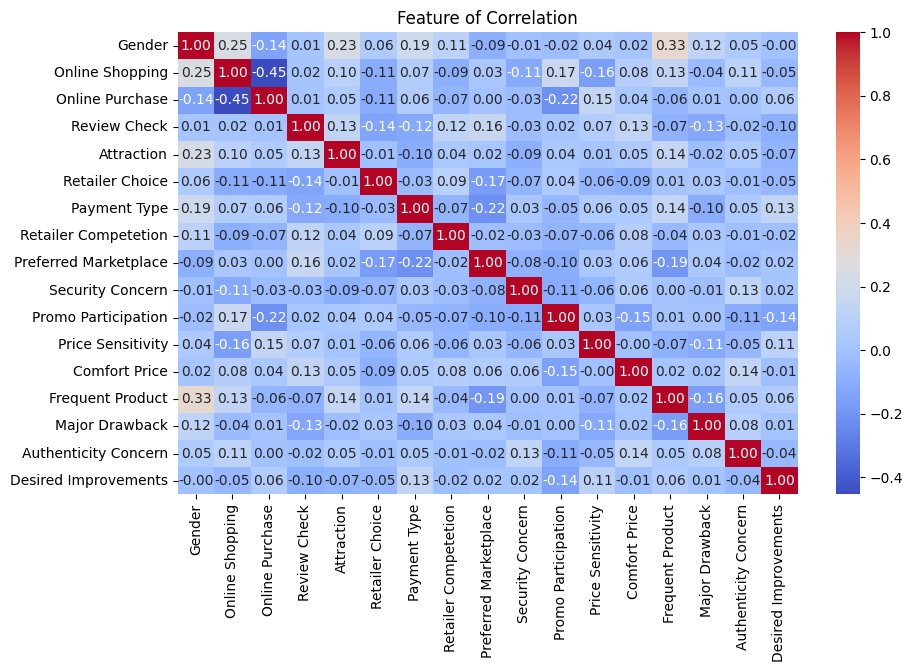

In [11]:
#Co-relation Heatmap
df_numeric = df.select_dtypes(include=['number'])

# Check if df_numeric is empty
if df_numeric.empty:
    print("No numeric columns found in the dataset.")
else:
    # Plot correlation heatmap
    plt.figure(figsize=(10,6))
    sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Feature of Correlation')
    plt.show()



In [12]:
print(df_numeric.columns)  # Check if columns exist
print(df_numeric.shape)    # Ensure there are numeric columns (shape[1] > 0)

# Ensure there are numeric columns before scaling
if not df_numeric.empty:
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(df_numeric)
    df_scaled = pd.DataFrame(scaled_data, columns=df_numeric.columns)
    print(df_scaled.head())
else:
    print("No numeric columns to scale!")

Index(['Gender', 'Online Shopping', 'Online Purchase', 'Review Check',
       'Attraction', 'Retailer Choice', 'Payment Type', 'Retailer Competetion',
       'Preferred Marketplace', 'Security Concern', 'Promo Participation',
       'Price Sensitivity', 'Comfort Price', 'Frequent Product',
       'Major Drawback', 'Authenticity Concern', 'Desired Improvements'],
      dtype='object')
(201, 17)
     Gender  Online Shopping  Online Purchase  Review Check  Attraction  \
0  1.244297         1.229837        -0.904624     -0.688751   -0.421840   
1 -0.740653         1.229837        -0.904624     -0.688751   -1.165612   
2 -0.740653        -0.724292         0.786812     -0.688751   -0.421840   
3  1.244297        -0.724292         0.786812     -0.688751   -0.421840   
4 -0.740653         1.229837        -0.904624      0.329182   -0.421840   

   Retailer Choice  Payment Type  Retailer Competetion  Preferred Marketplace  \
0        -1.482468      1.732082             -0.551401              -0.

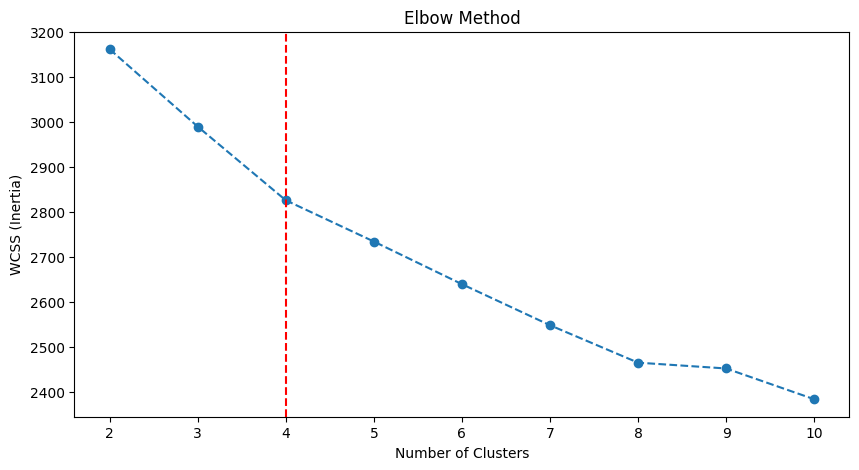

Silhouette Score with 4 clusters: 0.041818063137072994


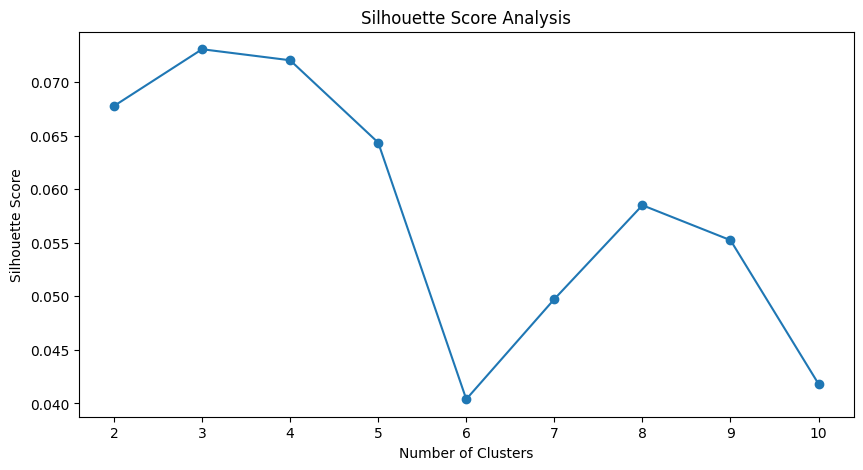

In [13]:
wcss = []
silhouette_scores = []
cluster_range = range(2, 11)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(scaled_data, kmeans.labels_))

# Plot Elbow Curve
plt.figure(figsize=(10, 5))
plt.plot(cluster_range, wcss, marker='o', linestyle='--')
plt.axvline(x=4, color='red', linestyle='--', label='Chosen k=4')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Inertia)')
plt.title('Elbow Method')
plt.xticks(cluster_range)
plt.show()

# Plot Silhouette Scores
plt.figure(figsize=(10, 5))
plt.plot(cluster_range, silhouette_scores, marker='o')
silhouette = silhouette_score(scaled_data, kmeans.labels_)
print("Silhouette Score with 4 clusters:", silhouette)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.xticks(cluster_range)
plt.title('Silhouette Score Analysis')
plt.show()




In [14]:
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

# Add cluster labels to data
df['cluster'] = clusters
df['cluster'].head()

,cluster
0,1
1,3
2,4
3,1
4,4


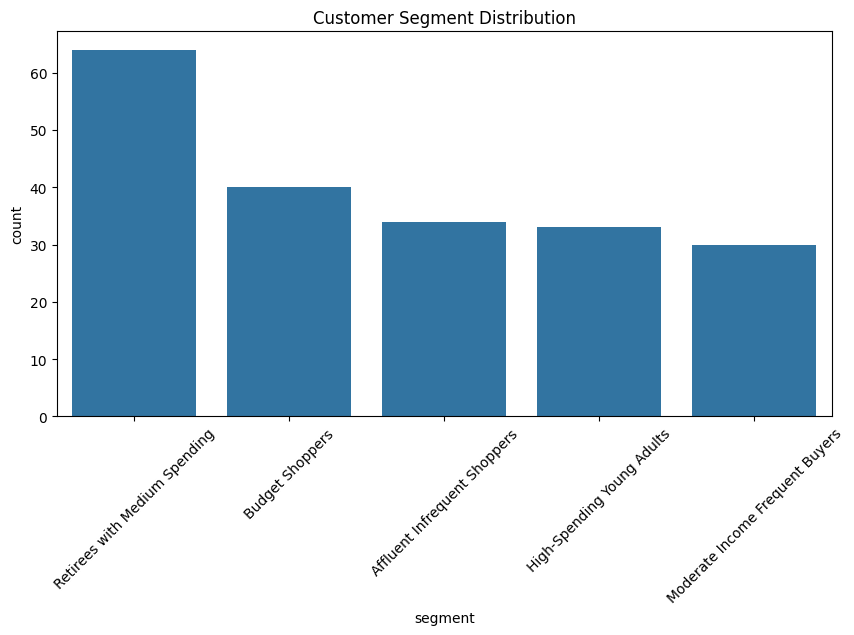

In [15]:
#segmentation of customers
segment_labels = {
    0: "Budget Shoppers",
    1: "High-Spending Young Adults",
    2: "Moderate Income Frequent Buyers",
    3: "Affluent Infrequent Shoppers",
    4: "Retirees with Medium Spending"
}

df['segment'] = df['cluster'].map(segment_labels)


plt.figure(figsize=(10, 5))
sns.countplot(x='segment', data=df, order=df['segment'].value_counts().index)
plt.title('Customer Segment Distribution')
plt.xticks(rotation=45)
plt.show()


In [16]:
df

,Gender,Online Shopping,Online Purchase,Review Check,Attraction,Retailer Choice,Payment Type,Retailer Competetion,Preferred Marketplace,Security Concern,Promo Participation,Price Sensitivity,Comfort Price,Frequent Product,Major Drawback,Authenticity Concern,Desired Improvements,cluster,segment
0,2,4,0,0,1,0,2,0,2,3,2,1,0,2,5,1,10,1,High-Spending Young Adults
1,1,4,0,0,0,3,1,0,3,0,3,3,0,2,1,1,10,3,Affluent Infrequent Shoppers
2,1,2,2,0,1,0,1,0,2,2,1,1,0,2,5,3,3,4,Retirees with Medium Spending
3,2,2,2,0,1,3,1,2,0,2,3,1,0,2,1,1,0,1,High-Spending Young Adults
4,1,4,0,1,1,0,1,0,1,3,3,1,2,1,5,2,6,4,Retirees with Medium Spending
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,1,1,2,2,0,3,1,0,3,3,0,0,0,2,3,3,0,4,Retirees with Medium Spending
197,2,4,1,0,0,3,1,0,2,3,2,1,2,2,5,0,5,4,Retirees with Medium Spending
198,1,4,1,0,1,0,1,0,3,0,2,1,1,2,5,1,2,0,Budget Shoppers
199,1,3,0,2,1,2,1,0,3,3,0,1,0,2,5,0,19,2,Moderate Income Frequent Buyers
